# Procesamiento del dataset "Factores de rendimiento en estudiantes (*Student Performance Factors*)"

Ruta del dataset en Kaggle: https://www.kaggle.com/datasets/lainguyn123/student-performance-factors

In [1]:
# Cargar paquetes necesarios
#!pip install mlxtend 
#!pip install umap-learn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.graph_objects as go # Necesario para crear multiples Pie Charts en una figura
from plotly.subplots import make_subplots # Necesario para crear multiples Pie Charts en una figura

# Selección de características
from sklearn.feature_selection import mutual_info_classif # InfoGain
from sklearn.feature_selection import VarianceThreshold # Low Variance
from sklearn.feature_selection import SelectKBest, f_classif # Univariate feature selection
from sklearn.feature_selection import SelectKBest, chi2 # Chi2
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso # LASSO
from sklearn.ensemble import RandomForestClassifier # Random Forest Importance

# Reducción de dimensionalidad
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE
from umap import UMAP

In [2]:
# Cargar dataset
data = pd.read_csv(r'StudentPerformanceFactors.csv')
raw_data = data

# Exploración de los datos

### 1. Visualización inicial

In [3]:
data

Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0                23          84                  Low                High   
1                19          64                  Low              Medium   
2                24          98               Medium              Medium   
3                29          89                  Low              Medium   
4                19          92               Medium              Medium   
...             ...         ...                  ...                 ...   
6602             25          69                 High              Medium   
6603             23          76                 High              Medium   
6604             20          90               Medium                 Low   
6605             10          86                 High                High   
6606             15          67               Medium                 Low   

     Extracurricular_Activities  Sleep_Hours  Previous_Scores  \
0                            No            7               73   
1                            No            8               59   
2                           Yes            7               91   
3                           Yes            8               98   
4                           Yes            6               65   
...                         ...          ...              ...   
6602                         No            7               76   
6603                         No            8               81   
6604                        Yes            6               65   
6605                        Yes            6               91   
6606                        Yes            9               94   

     Motivation_Level Internet_Access  Tutoring_Sessions Family_Income  \
0                 Low             Yes                  0           Low   
1                 Low             Yes                  2        Medium   
2              Medium             Yes                  2        Medium   
3              Medium             Yes                  1        Medium   
4              Medium             Yes                  3        Medium   
...               ...             ...                ...           ...   
6602           Medium             Yes                  1          High   
6603           Medium             Yes                  3           Low   
6604              Low             Yes                  3           Low   
6605             High             Yes                  2           Low   
6606           Medium             Yes                  0        Medium   

     Teacher_Quality School_Type Peer_Influence  Physical_Activity  \
0             Medium      Public       Positive                  3   
1             Medium      Public       Negative                  4   
2             Medium      Public        Neutral                  4   
3             Medium      Public       Negative                  4   
4               High      Public        Neutral                  4   
...              ...         ...            ...                ...   
6602          Medium      Public       Positive                  2   
6603            High      Public       Positive                  2   
6604          Medium      Public       Negative                  2   
6605          Medium     Private       Positive                  3   
6606          Medium      Public       Positive                  4   

     Learning_Disabilities Parental_Education_Level Distance_from_Home  \
0                       No              High School               Near   
1                       No                  College           Moderate   
2                       No             Postgraduate               Near   
3                       No              High School           Moderate   
4                       No                  College               Near   
...                    ...                      ...                ...   
6602                    No              High School             

In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [5]:
print(data.describe())

       Hours_Studied   Attendance  Sleep_Hours  Previous_Scores  \
count    6607.000000  6607.000000   6607.00000      6607.000000   
mean       19.975329    79.977448      7.02906        75.070531   
std         5.990594    11.547475      1.46812        14.399784   
min         1.000000    60.000000      4.00000        50.000000   
25%        16.000000    70.000000      6.00000        63.000000   
50%        20.000000    80.000000      7.00000        75.000000   
75%        24.000000    90.000000      8.00000        88.000000   
max        44.000000   100.000000     10.00000       100.000000   

       Tutoring_Sessions  Physical_Activity   Exam_Score  
count        6607.000000        6607.000000  6607.000000  
mean            1.493719           2.967610    67.235659  
std             1.230570           1.031231     3.890456  
min             0.000000           0.000000    55.000000  
25%             1.000000           2.000000    65.000000  
50%             1.000000           3.00000

In [6]:
# Categorical columns
cat_col = [col for col in data.columns if data[col].dtype == 'object']
print('Categorical columns :',cat_col)
# Numerical columns
num_col = [col for col in data.columns if data[col].dtype != 'object']
print('Numerical columns :',num_col)

Categorical columns : ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender']
Numerical columns : ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score']


### Descrición de los datos
| Atributo | Abreviación | Descripción | Respuestas / Unidades |
| -------- | ------- | ------- | ------- |
| Hours_Studied  | HS | Número de horas empleadas en estudiar a la semana | hrs |
| Attendance | A |Porcentaje de clases asistidas | % |
| Parental_Involvement | PI | Nivel de involucramiento de los padres en la educación del estudiante| Low, Medium, High |
| Access_to_Resources | AtR | Disponibilidad de recursos educativos | Low, Medium, High |
| Extracurricular_Activities | EA | Participación en actividades extracurriculares | Yes, No |
| Sleep_Hours | SH | Horas de sueño al día | hrs |
| Previous_Scores | PS | Calificación en examenes previos | 0-100 |
| Motivation_Level | ML | Nivel de motivación del estudiante | Low, Medium, High |
| Internet_Access | IA | Disponibilidad de acceso a internet | Yes, No |
| Tutoring_Sessions | TS | Número de sesiones de asesoria asistidas al mes | - |
| Family_Income | FI | Nivel de ingresos familiares | Low, Medium, High |
| Teacher_Quality | TQ | Calidad de los profesores | Low, Medium, High |
| School_Type | ST | Tipo de escuela a la que asiste | Public, Private |
| Peer_Influence | PeI | Influencia de los compañeros en el rendimiento académico | Positive, Neutral, Negative |
| Physical_Activity | PA | Núnero proedio de horas dedicadas a realizar actividad física a la semana | hrs |
| Learning_Disabilities | LD | Presencia de discapacidades de aprendizaje  | Yes, No |
| Parental_Education_Level | PEL | Nivel educativo mayor de los padres | High School, College, Postgraduate |
| Distance_from_Home | DfH | Distancia del hogar a la escuela | Near, Moderate, Far |
| Gender	 | G | Género del estudiante | Male, Female |
| Exam_Score | ES | Calificación en el examen final | 0-100 |

Hay un total de **6607** estudiantes.
Los datos tienen **20** atributos.
* Cuantitativos: 7
* Cualitativos: 13
  
El atributo "Exam_Score" es considerado como la variable **(clase)** que se buscaría predecir a través de los otros 19 atributos.

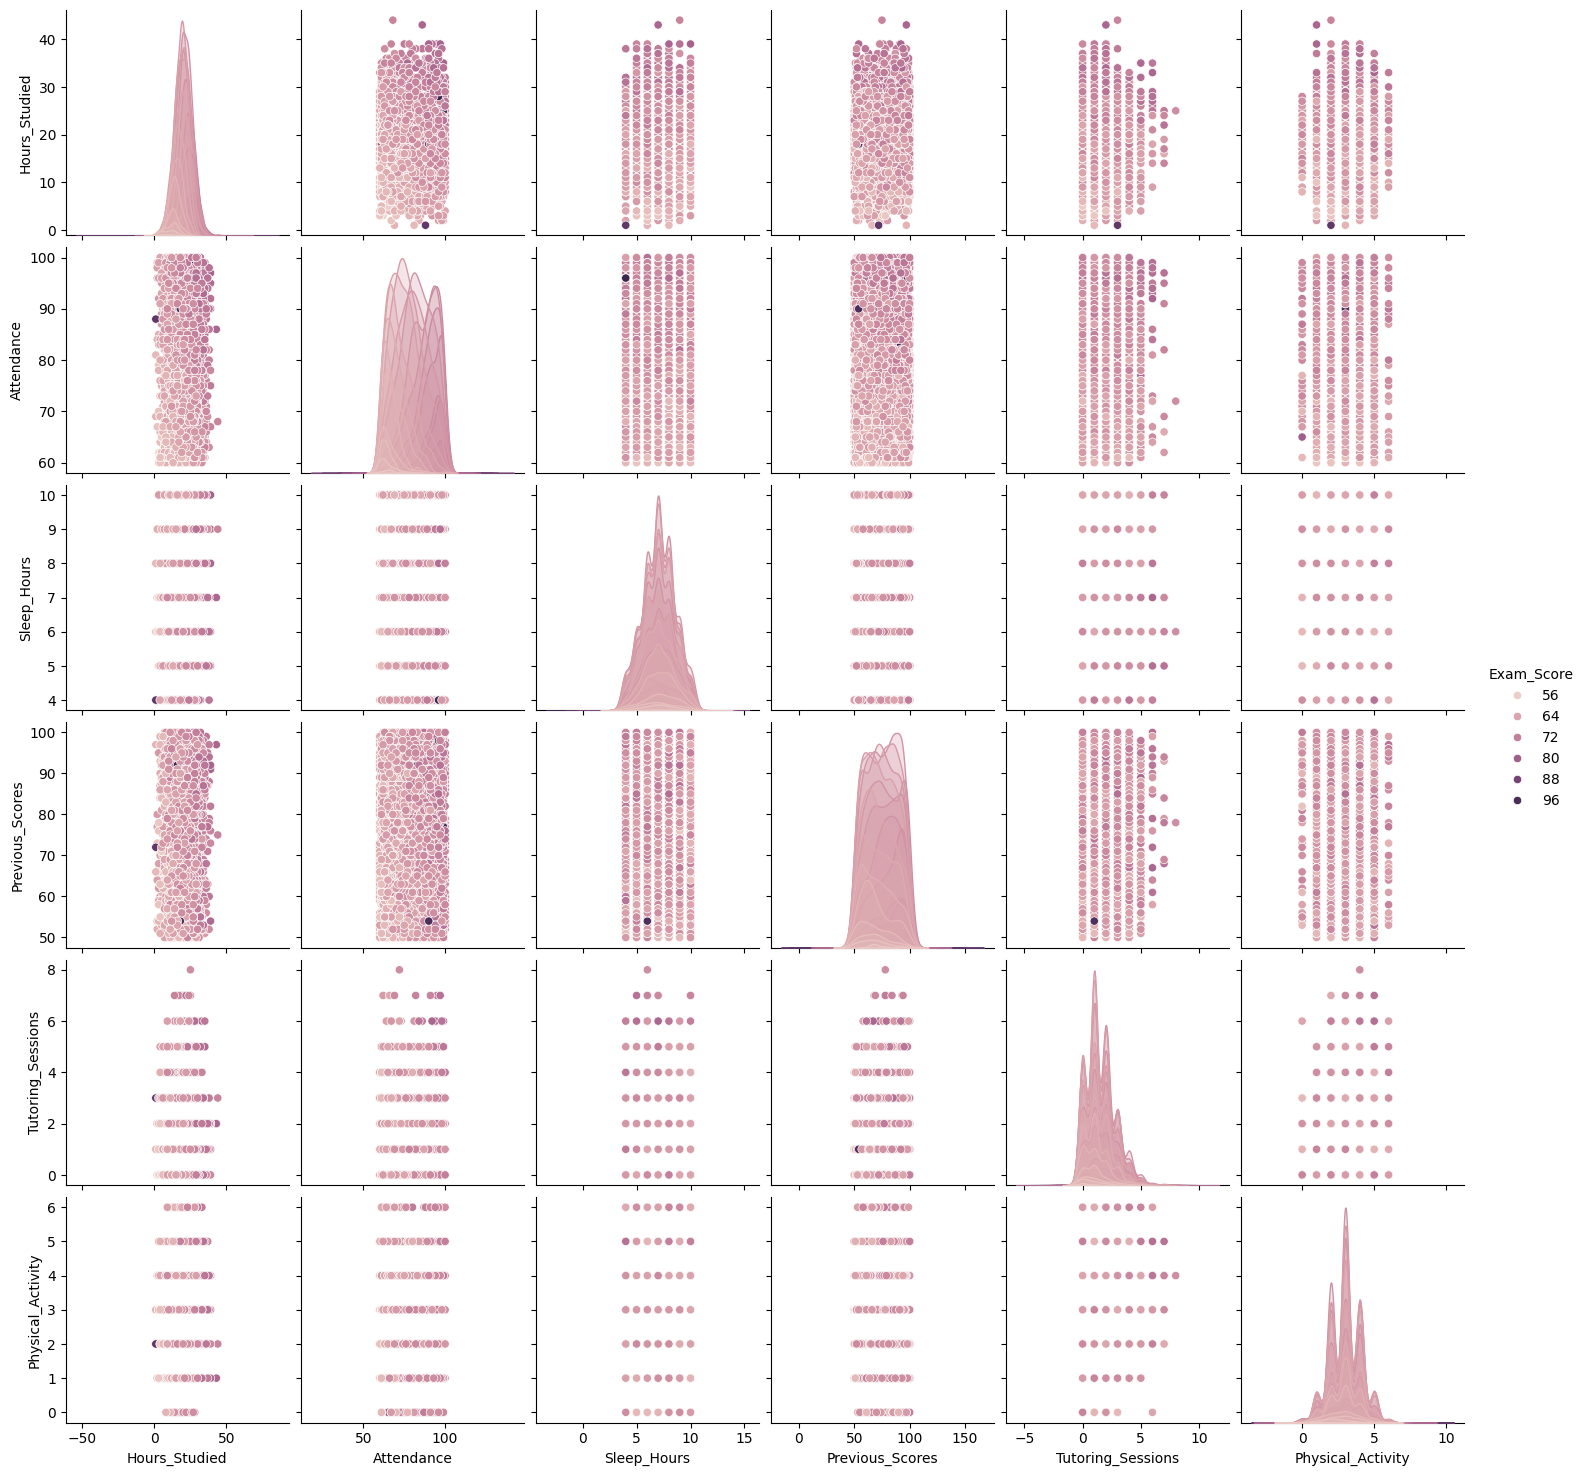

In [7]:
sns.pairplot(data, hue="Exam_Score")

A simple vista, no se visualiza un patrón de separación

### 2. Visualización de los datos cuantitativos con medidas de tendencia central (Violin plot)

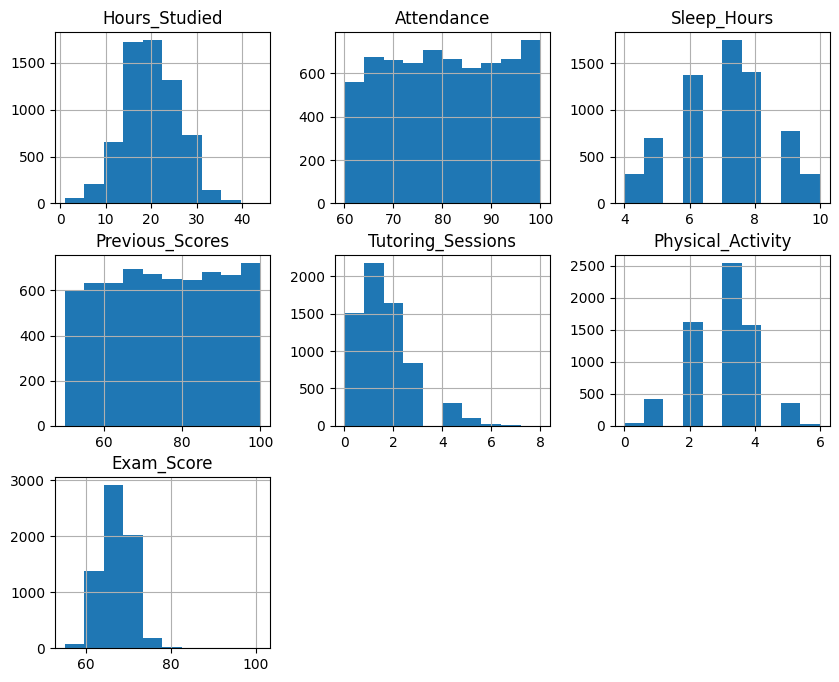

In [8]:
fig = data.hist(figsize=(10, 8)) # Modificar tamaño de los graficos para que se aprecien mejor
plt.show() # Muestra los graficos

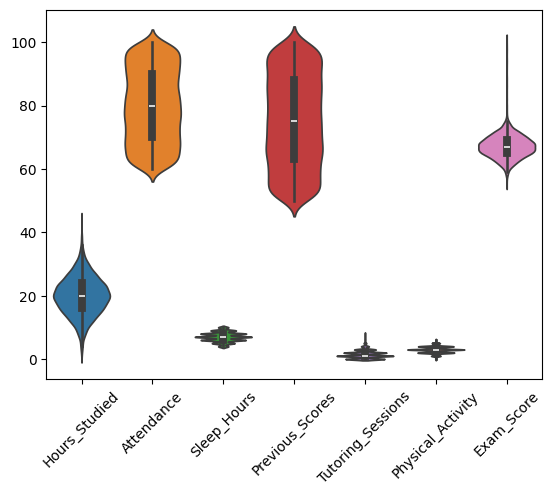

In [9]:
# Visualización de los datos cuantitativos con medidas de tendencia central (Violin plot)
sns.violinplot(data)
plt.xticks(rotation=45)  # Rotar etiquetas para que se visualicen mejor
plt.show()

### 3. Visualización de los datos cualitativos

In [10]:
# Categorical Values
#Parental_Involvement
PI = data['Parental_Involvement'].value_counts()
labels_PI = PI.index
values_PI = PI.values

# Access_to_Resources
AtR = data['Access_to_Resources'].value_counts()
labels_AtR = AtR.index
values_AtR = AtR.values

# Extracurricular_Activities	
EA = data['Extracurricular_Activities'].value_counts()
labels_EA = EA.index
values_EA = EA.values


# Motivation_Level	
ML = data['Motivation_Level'].value_counts()
labels_ML = ML.index
values_ML = ML.values

# Internet_Access	
IA = data['Internet_Access'].value_counts()
labels_IA = IA.index
values_IA = IA.values

# Family_Income	
FI = data['Family_Income'].value_counts()
labels_FI = FI.index
values_FI = FI.values

# Teacher_Quality	
TQ = data['Teacher_Quality'].value_counts()
labels_TQ = TQ.index
values_TQ = TQ.values

# School_Type	
ST = data['School_Type'].value_counts()
labels_ST = ST.index
values_ST = ST.values

# Peer_Influence	
PeI = data['Peer_Influence'].value_counts()
labels_PeI = PeI.index
values_PeI = PeI.values

# Learning_Disabilities	
LD = data['Learning_Disabilities'].value_counts()
labels_LD = LD.index
values_LD = LD.values

# Parental_Education_Level	
PEL = data['Parental_Education_Level'].value_counts()
labels_PEL = PEL.index
values_PEL = PEL.values

# Distance_from_Home	
DfH = data['Distance_from_Home'].value_counts()
labels_DfH = DfH.index
values_DfH = DfH.values

# Gender
G = data['Gender'].value_counts()
labels_G = G.index
values_G = G.values

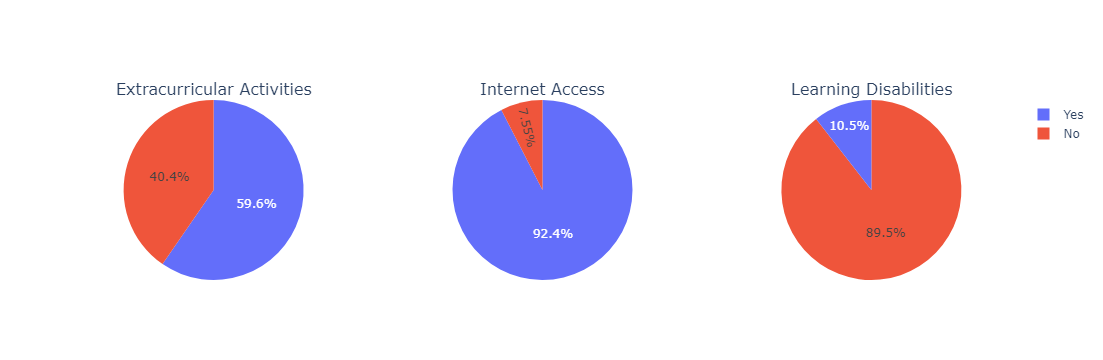

In [11]:
# Atributos con niveles Si / No
fig = make_subplots(rows=1, cols=3,
                    specs=[[{'type':'pie'}, {'type':'pie'}, {'type':'pie'}]],
                    subplot_titles=("Extracurricular Activities","Internet Access","Learning Disabilities"))

fig.add_trace(go.Pie(labels=labels_EA, values=values_EA, name="Extracurricular Activities"), row=1, col=1)
fig.add_trace(go.Pie(labels=labels_IA, values=values_IA, name="Internet Access"), row=1, col=2)
fig.add_trace(go.Pie(labels=labels_LD, values=values_LD, name="Learning Disabilities"), row=1, col=3)

fig.show()

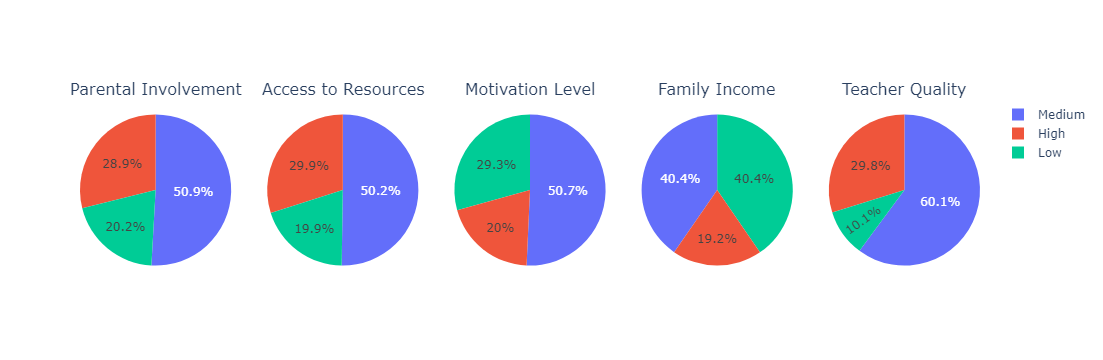

In [12]:
# Atributos con niveles Bajo / Medio / Alto
fig = make_subplots(rows=1, cols=5,
                    specs=[[{'type':'pie'}, {'type':'pie'}, {'type':'pie'}, {'type':'pie'},{'type':'pie'}]],
                    subplot_titles=("Parental Involvement", "Access to Resources", "Motivation Level","Family Income","Teacher Quality"))

fig.add_trace(go.Pie(labels=labels_PI, values=values_PI, name="Parental Involvement"), row=1, col=1)
fig.add_trace(go.Pie(labels=labels_AtR, values=values_AtR, name="Access to Resources"), row=1, col=2)
fig.add_trace(go.Pie(labels=labels_ML, values=values_ML, name="Motivation Level"), row=1, col=3)
fig.add_trace(go.Pie(labels=labels_FI, values=values_FI, name="Family Income"), row=1, col=4)
fig.add_trace(go.Pie(labels=labels_TQ, values=values_TQ, name="Teacher Quality"), row=1, col=5)

fig.show()

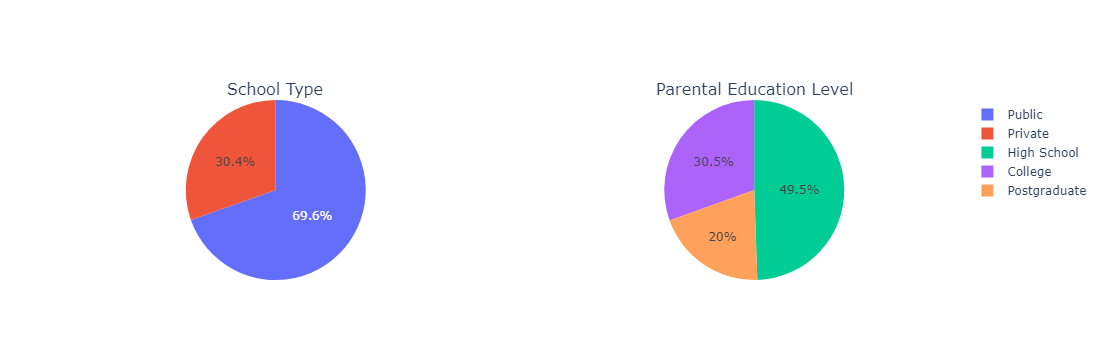

In [13]:
# Atributos relacionados al tipo de educación
fig = make_subplots(rows=1, cols=2,
                    specs=[[{'type':'pie'}, {'type':'pie'}]],
                    subplot_titles=("School Type","Parental Education Level"))

fig.add_trace(go.Pie(labels=labels_ST, values=values_ST, name="School Type"), row=1, col=1)
fig.add_trace(go.Pie(labels=labels_PEL, values=values_PEL, name="Parental Education Level"), row=1, col=2)

fig.show()

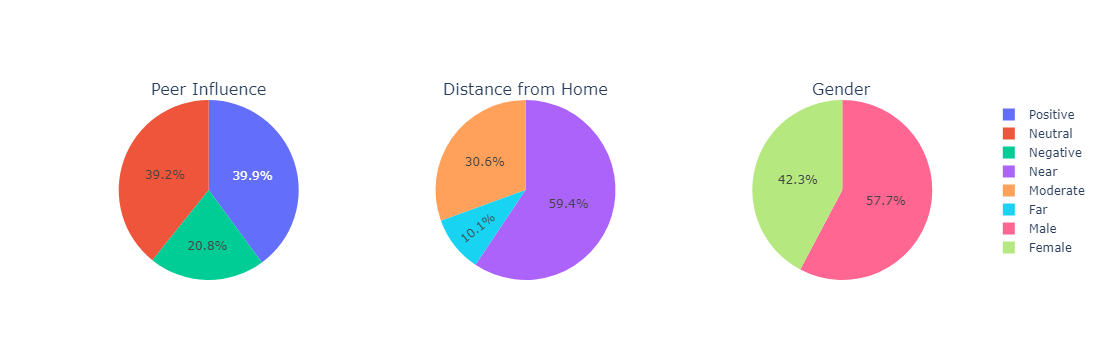

In [14]:
# Otros datos
fig = make_subplots(rows=1, cols=3,
                    specs=[[{'type':'pie'}, {'type':'pie'}, {'type':'pie'}]],
                    subplot_titles=("Peer Influence","Distance from Home","Gender"))

fig.add_trace(go.Pie(labels=labels_PeI, values=values_PeI, name="Peer Influence"), row=1, col=1)
fig.add_trace(go.Pie(labels=labels_DfH, values=values_DfH, name="Distance from Home"), row=1, col=2)
fig.add_trace(go.Pie(labels=labels_G, values=values_G, name="Gender"), row=1, col=3)

fig.show()

## A) Limpieza de datos

### 1. Eliminación de instancias con valores nulos

In [15]:
data = raw_data.dropna()
print("Se eliminaron",len(raw_data) - len(data), "instancias con valores nulos")

Se eliminaron 229 instancias con valores nulos


### 2. Eliminación de outliers en variables numéricas

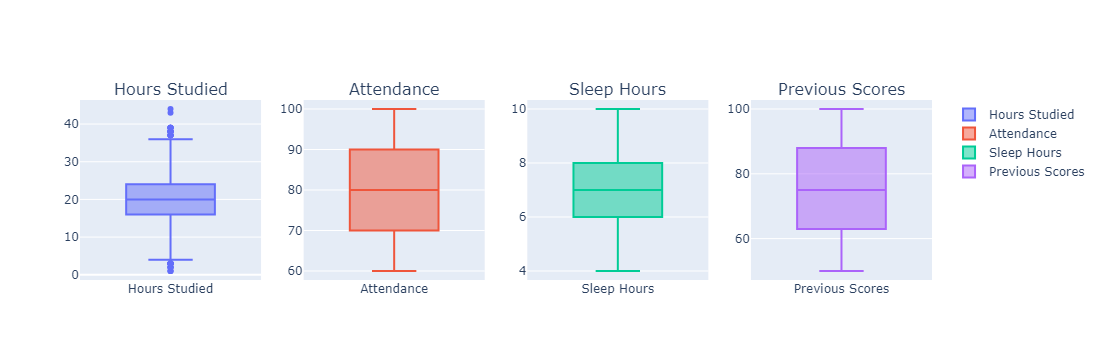

In [16]:
fig = make_subplots(rows=1, cols=4,
                    specs=[[{'type':'box'}, {'type':'box'}, {'type':'box'}, {'type':'box'}]],
                    subplot_titles=("Hours Studied", "Attendance", "Sleep Hours", "Previous Scores"))

fig.add_trace(go.Box(y=data['Hours_Studied'], name="Hours Studied"), row=1, col=1)
fig.add_trace(go.Box(y=data['Attendance'], name="Attendance"), row=1, col=2)
fig.add_trace(go.Box(y=data['Sleep_Hours'], name="Sleep Hours"), row=1, col=3)
fig.add_trace(go.Box(y=data['Previous_Scores'], name="Previous Scores"), row=1, col=4)

fig.show()

**Hours Studied** presenta outliers

In [17]:
# Cálculo de media y desviació estándar
mean = data['Hours_Studied'].mean()
std  = data['Hours_Studied'].std()
 
# Cálculo de límites superior e inferior
lower_bound = mean - std*2
upper_bound = mean + std*2
 
print('Lower Bound :',lower_bound)
print('Upper Bound :',upper_bound)
 
# Eliminación de outliers
data = data[(data['Hours_Studied'] >= lower_bound)
                & (data['Hours_Studied'] <= upper_bound)]

data_filtered = data

Lower Bound : 8.00618963223345
Upper Bound : 31.948027990845887


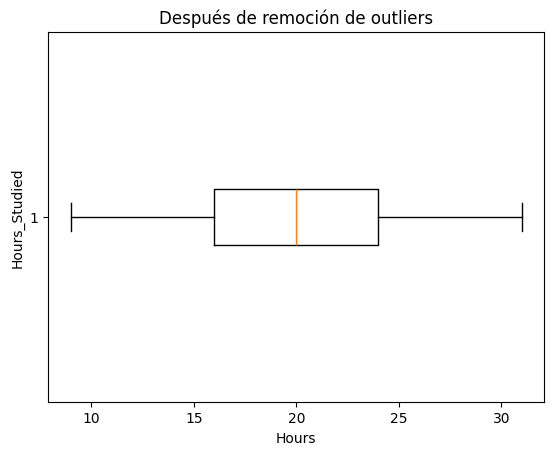

In [18]:
plt.boxplot(data['Hours_Studied'], vert=False)
plt.ylabel('Hours_Studied')
plt.xlabel('Hours')
plt.title('Después de remoción de outliers')
plt.show()

In [19]:
data = data.dropna()
print("Se eliminaron",len(raw_data) - len(data), "instancias, en la limpieza de otliers")

Se eliminaron 577 instancias, en la limpieza de otliers


### 3. Transformación de variables categóricas a numéricas

In [20]:
replace_dict = {'Yes': '1', 'No': '0', 'Low' : '1', 'Medium': '2', 'High': '3', 'Positive': '1', 'Negative': '2', 'Neutral': '3', 'Public': '1', 'Private': '2', 
                'College': '1', 'High School': '2', 'Postgraduate': '3', 'Near': '1', 'Moderate': '2', 'Far': '2', 'Male': '1', 'Female': '2'}

data['Extracurricular_Activities'] = data['Extracurricular_Activities'].replace(replace_dict)
data['Internet_Access'] = data['Internet_Access'].replace(replace_dict)
data['Learning_Disabilities'] = data['Learning_Disabilities'].replace(replace_dict)
data['Parental_Involvement'] = data['Parental_Involvement'].replace(replace_dict)
data['Access_to_Resources'] = data['Access_to_Resources'].replace(replace_dict)
data['Motivation_Level'] = data['Motivation_Level'].replace(replace_dict)
data['Family_Income'] = data['Family_Income'].replace(replace_dict)
data['Teacher_Quality'] = data['Teacher_Quality'].replace(replace_dict)
data['School_Type'] = data['School_Type'].replace(replace_dict)
data['Peer_Influence'] = data['Peer_Influence'].replace(replace_dict)
data['Parental_Education_Level'] = data['Parental_Education_Level'].replace(replace_dict)
data['Distance_from_Home'] = data['Distance_from_Home'].replace(replace_dict)
data['Gender'] = data['Learning_Disabilities'].replace(replace_dict)

print(data.head())

   Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                    1                   3   
1             19          64                    1                   2   
2             24          98                    2                   2   
3             29          89                    1                   2   
4             19          92                    2                   2   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                          0            7               73                1   
1                          0            8               59                1   
2                          1            7               91                2   
3                          1            8               98                2   
4                          1            6               65                2   

  Internet_Access  Tutoring_Sessions Family_Income Teacher_Quality  \
0               

## B) Selección de características

In [21]:
# Separar clase de atributos
X = data.iloc[:, 0:-1]
y = data.iloc[:, -1]

### 1. Ganancia de información

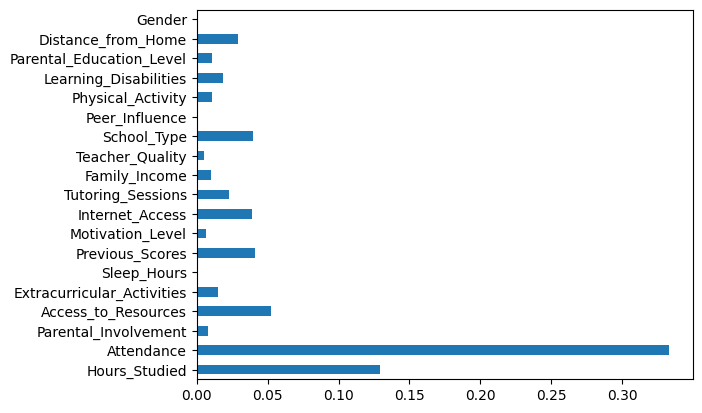

In [22]:
X_new = mutual_info_classif(X, y)
feat_imp = pd.Series(X_new, X.columns[0:len(X.columns)])
feat_imp.plot(kind='barh')
plt.show()

Las características seleccionadas son: **Attendance** y **Hours Studied**

### 2. Low variance

In [23]:
sel = VarianceThreshold(threshold=0.5)
sel.fit_transform(X)

selected_features = sel.get_support()
print('Las características seleccionadas son:', list(X.columns[selected_features]))

Las características seleccionadas son: ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Family_Income', 'Peer_Influence', 'Physical_Activity']


### 3. Univariate feature selection

In [24]:
select_kbest = SelectKBest(score_func=f_classif, k=4)  # change k
select_kbest.fit_transform(X, y)

selected_features = select_kbest.get_support()
print('Las características seleccionadas son:', list(X.columns[selected_features]))

Las características seleccionadas son: ['Hours_Studied', 'Attendance', 'Access_to_Resources', 'Previous_Scores']


### 4. Chi2

In [25]:
chi2_selector = SelectKBest(score_func=chi2, k=4)  # change k
chi2_selector.fit_transform(X, y)

selected_features = chi2_selector.get_support()
print('Las características seleccionadas son:', list(X.columns[selected_features]))

Las características seleccionadas son: ['Hours_Studied', 'Attendance', 'Previous_Scores', 'Tutoring_Sessions']


### 5. Forward selection

In [26]:
lr = LinearRegression()

ffs = SequentialFeatureSelector(lr, n_features_to_select=5, direction='forward')
ffs.fit(X, y)

selected_features = ffs.get_support()
print('Las características seleccionadas son:', list(X.columns[selected_features]))

Las características seleccionadas son: ['Hours_Studied', 'Attendance', 'Parental_Involvement', 'Access_to_Resources', 'Previous_Scores']


### 6. Backward elimination

In [27]:
bfs = SequentialFeatureSelector(lr, n_features_to_select=5, direction='backward')
bfs.fit(X, y)

selected_features = bfs.get_support()
print('Las características seleccionadas son:', list(X.columns[selected_features]))

Las características seleccionadas son: ['Hours_Studied', 'Attendance', 'Parental_Involvement', 'Access_to_Resources', 'Previous_Scores']


### 7. LASSO

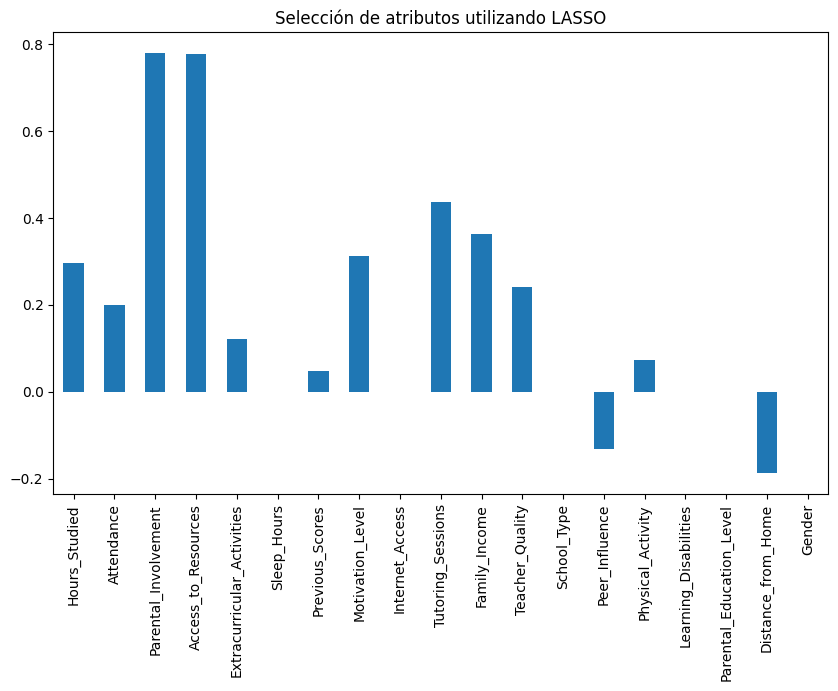

In [28]:
lasso = Lasso(alpha=0.1)  # adjust alpha
lasso.fit(X, y)

lasso_coef = pd.Series(lasso.coef_, index=X.columns)

plt.figure(figsize=(10, 6))
lasso_coef.plot(kind='bar')
plt.title('Selección de atributos utilizando LASSO')
plt.show()

### 8. Random Forest Importance

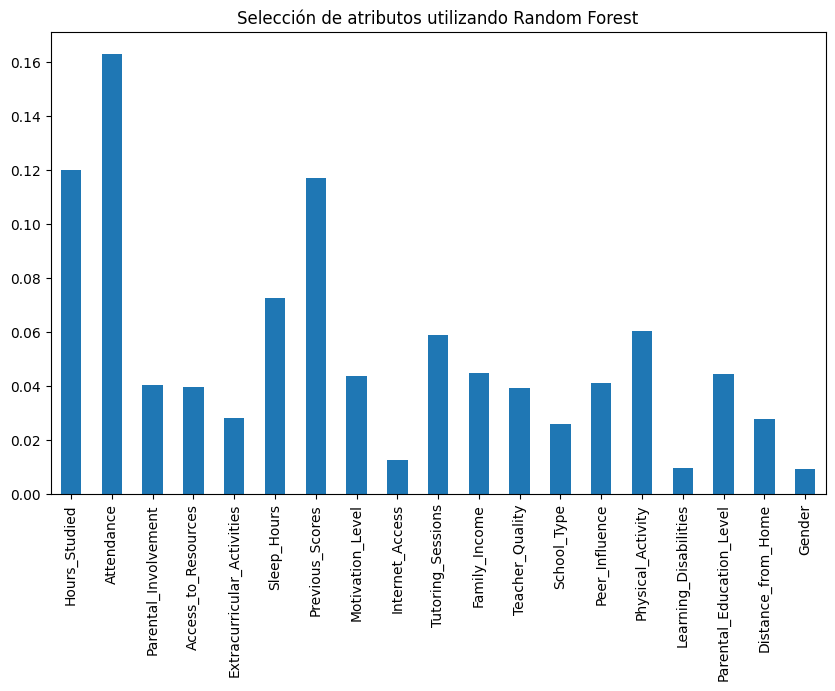

In [29]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

importances = rf.feature_importances_
forest_importances = pd.Series(importances, index=X.columns)

plt.figure(figsize=(10, 6))
forest_importances.plot(kind='bar')
plt.title('Selección de atributos utilizando Random Forest')
plt.show()

De acuerdo con los analisis de selección de características, los atributos que se seleccionaron son:
1. Hours Studied
2. Attendance
3. Previous Scores
4. Tutoring Sessions
5. Access to Resources

## C) Reducción de dimensionalidad

In [30]:
X = data_filtered.iloc[:, 0:-1]

In [31]:
# Transformación de variables categóricas con One-Hot encoding
X_encoded = pd.get_dummies(X, drop_first=True)
X_encoded

Hours_Studied  Attendance  Sleep_Hours  Previous_Scores  \
0                23          84            7               73   
1                19          64            8               59   
2                24          98            7               91   
3                29          89            8               98   
4                19          92            6               65   
...             ...         ...          ...              ...   
6602             25          69            7               76   
6603             23          76            8               81   
6604             20          90            6               65   
6605             10          86            6               91   
6606             15          67            9               94   

      Tutoring_Sessions  Physical_Activity  Parental_Involvement_Low  \
0                     0                  3                      True   
1                     2                  4                      True   
2                     2                  4                     False   
3                     1                  4                      True   
4                     3                  4                     False   
...                 ...                ...                       ...   
6602                  1                  2                     False   
6603                  3                  2                     False   
6604                  3                  2                     False   
6605                  2                  3                     False   
6606                  0                  4                     False   

      Parental_Involvement_Medium  Access_to_Resources_Low  \
0                           False                    False   
1                           False                    False   
2                            True                    False   
3                           False                    False   
4                            True                    False   
...                           ...                      ...   
6602                        False                    False   
6603                        False                    False   
6604                         True                     True   
6605                        False                    False   
6606                         True                     True   

      Access_to_Resources_Medium  ...  Teacher_Quality_Medium  \
0                          False  ...                    True   
1                           True  ...                    True   
2                           True  ...                    True   
3                           True  ...                    True   
4                           True  ...                   False   
...                          ...  ...                     ...   
6602                        True  ...                    True   
6603                        True  ...                   False   
6604                       False  ...                    True   
6605                       False  ...                    True   
6606                       False  ...                    True   

      School_Type_Public  Peer_Influence_Neutral  Peer_Influence_Positive  \
0                   True                   False                     True   
1                   True                   False                    False   
2                   True                    True                    False   
3                   True                   False                    False   
4                   True                    True                    False   
...                  ...                     ...                      ...   
6602                True                   False                     True   
6603                True                   False                     True   
6604                True                   False                    False   
6605               False                   False                

In [32]:
# Normalización
X_scaled = StandardScaler().fit_transform(X_encoded)
X_scaled

array([[ 5.83096068e-01,  3.43701827e-01, -1.77509768e-02, ...,
        -6.59051015e-01,  8.22150274e-01,  8.54850414e-01],
       [-1.92778437e-01, -1.39193339e+00,  6.64022208e-01, ...,
         1.51733322e+00, -1.21632265e+00, -1.16979530e+00],
       [ 7.77064695e-01,  1.55864648e+00, -1.77509768e-02, ...,
        -6.59051015e-01,  8.22150274e-01,  8.54850414e-01],
       ...,
       [ 1.19018892e-03,  8.64392393e-01, -6.99524161e-01, ...,
        -6.59051015e-01,  8.22150274e-01, -1.16979530e+00],
       [-1.93849608e+00,  5.17265349e-01, -6.99524161e-01, ...,
        -6.59051015e-01, -1.21632265e+00, -1.16979530e+00],
       [-9.68652943e-01, -1.13158811e+00,  1.34579539e+00, ...,
        -6.59051015e-01,  8.22150274e-01,  8.54850414e-01]])

### 1. PCA

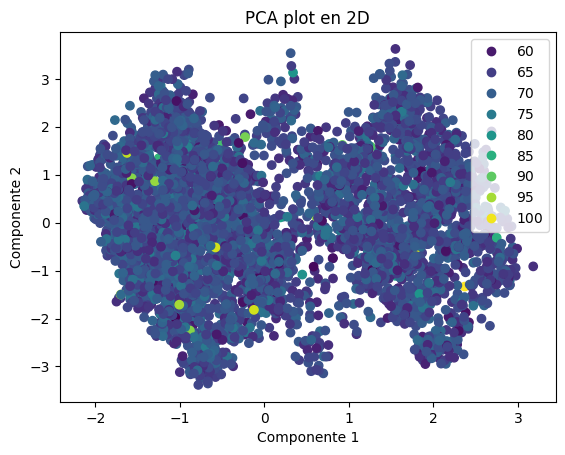

In [33]:
X_PCA = PCA(n_components=2).fit_transform(X_scaled)

scatter = plt.scatter(X_PCA[:, 0], X_PCA[:, 1], c=y)
plt.title('PCA plot en 2D')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.legend(*scatter.legend_elements())
plt.show()

### 2. LDA

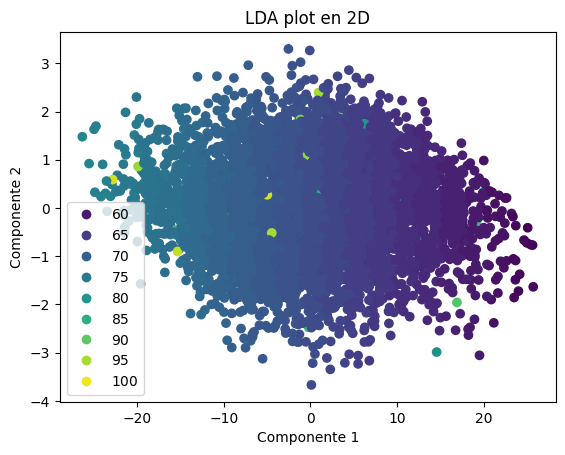

In [34]:
X_LDA = LDA(n_components=2).fit_transform(X_scaled,y)

scatter = plt.scatter(X_LDA[:,0], X_LDA[:,1], c=y)
plt.title('LDA plot en 2D')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.legend(*scatter.legend_elements())
plt.show()

### 3. t-SNE

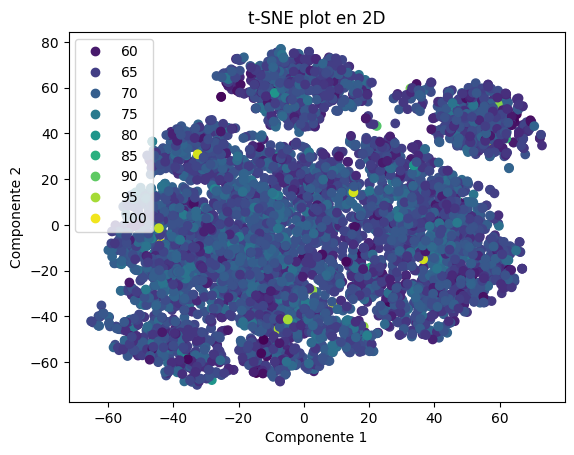

In [35]:
X_TSNE = TSNE(n_components=2).fit_transform(X_scaled)

scatter = plt.scatter(X_TSNE[:,0], X_TSNE[:,1], c=y)
plt.title('t-SNE plot en 2D')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.legend(*scatter.legend_elements())
plt.show()

### 4. UMAP

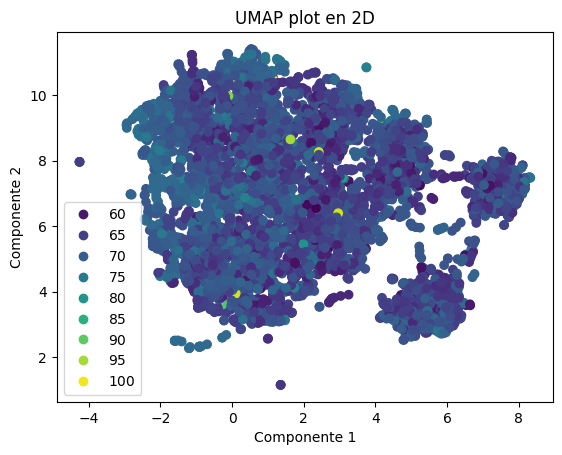

In [36]:
X_UMAP = UMAP(n_components=2).fit_transform(X_scaled,y)

scatter = plt.scatter(X_UMAP[:,0], X_UMAP[:,1], c=y)
plt.title('UMAP plot en 2D')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.legend(*scatter.legend_elements())
plt.show()

Ningún método de reducción de dimensionalidad logró separar los datos correctamente.